© [Mariia Seleznova](https://www.ai.math.uni-muenchen.de/members/phd_students/seleznova/index.html) 2022

https://github.com/mselezniova/MSML22

Distributed under the [Creative Commons Attribution License](https://creativecommons.org/licenses/by/4.0/)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format='svg'

import matplotlib
import matplotlib.pyplot as plt

import os

import numpy as np
import pandas as pd


import sys
sys.path.append('../../')

import cvxopt

# Lagrangian duality

Consider a convex minimization problem with inequality constraints:


$$
\begin{split}
\min_{w} \quad & f(w) \\
\text{s. t.} \quad & h_i(w) \leq 0, \quad 1\leq i \leq n, \\
\end{split}
$$

where $f,h_1,\dots,h_n$ are convex functions. **Lagrangian function** of this problem is defined as follows:

$$L(w,\lambda) = f(w) + \sum_{i=1}^N \lambda_i h_i(w),$$

where we introduced non-negative **Lagrangian multipliers** $\lambda_i, i=1,\dots,n$. We can now notice that the constrained optimization problem is equivalent to the following unconstrained problem:

$$\min_{w} \max_{\lambda\geq 0} L(w,\lambda)  \Leftrightarrow \min_w f(w) \quad \text{ s. t. } \quad  h_i(w) \leq 0, \quad 1\leq i \leq n$$

Indeed, one can see that maximization over the Lagrangian multipliers has a non-trivial solution only if the constraints are satisfied:

$$
\max_{\lambda\geq 0} L(w,\lambda) = \begin{cases} 
f(w) \quad \text{if } h_i(w) \leq 0, \quad \quad 1\leq i \leq n\\
+\infty \quad \ \text{  otherwise,} 
\end{cases}
$$

since if there is at least one positive $g_i$, one can choose arbitrarily large value of the corresponding Lagrangian multiplier. It is also easy to show the following inequality:

$$\max_{\lambda\geq 0} \min_{w} L(w,\lambda) \leq \min_{w} \max_{\lambda\geq 0} L(w,\lambda),$$

which holds even for non-convex problems. The optimization problem on the right hand side of the inequality is called the **primal problem** and the left hand side is called the **dual problem**. We can also define the **Lagrangian dual function** $g(\lambda)$:

$$g(\lambda) = \min_w L(w,\lambda)$$

Then the dual problem can be formulated as follows:

$$
\begin{split}
\max_{\lambda} \quad & g(\lambda) \\
\text{s. t.} \quad & \lambda_i \geq 0, \quad 1\leq i \leq n, \\
\end{split}
$$

In some cases, a dual problem has some favorable properties and/or is easier to solve that the primal problem, which motivates the study of the Lagrangian duality. 

### Strong duality

The solution of the dual problem, in general, only provides a **lower bound** for the solution of the primal problem. The difference between dual and primal solutions is called the **duality gap**. However, there exist sufficient conditions under which the duality gap is zero, i.e. 

$$\max_{\lambda\geq 0} \min_{w} L(w,\lambda) = \min_{w} \max_{\lambda\geq 0} L(w,\lambda)$$

This property of an optimization problem is called **strong duality** (opposed to **weak duality**, where there is a non-zero duality gap). If strong duality holds, then solving the dual problem also solves the primal problem.

A well-known sufficient condition for strong duality for convex optimization problems is **Slater's condition**, which can be formulated as follows:

**Theorem** (Slater's condition). *Suppose that the primal problem is convex (i.e. functions $f, h_1,\dots, h_n$ are all convex) and there exists a point in the relative interior of the problem's domain $x\in relint(D)$ $\bigl($where $D=dom(f)\cap\bigcap_{i=1}^n dom(h_i) \bigr)$ such that*

$$h_i(x) < 0, \quad 1\leq i \leq n$$

*then strong duality holds. If a constraint $h_i$ is affine then the strict inequality is not necessary for this constraint.*

An immediate consequence of the Slater's condition is that strong duality holds for all convex problems with affine-linear constraints that have a solution.

### Karush–Kuhn–Tucker (KKT) conditions

Karush–Kuhn–Tucker (KKT) conditions are necessary (under certain assumptions) conditions for a solution of a constrained optimization problem. KKT is a generalization of the Lagrangian multipliers method, which only workss for optimization problems with equality constraints, to the case of inequality constraints. Similarly to the Lagrange multipliers methods, KKT conditions essentially state that the optimal point has to be a **saddle point** of the Lagrangian function. Let us formulate KKT conditions for our problem, which is **convex and has only inequality constraints**.

*If* $w^*$ *is an optimum and Slater's condition is satisfied, then there exist multipliers* $\lambda_1,\dots,\lambda_n$, *such that the following four groups of conditions hold:*

**1. Stationarity:**

$\nabla_w L(w,\lambda) = \nabla_w f(w^*) + \sum_{i=1}^n \lambda_i \nabla_w h_i(w^*) = 0 $

**2. Primal feasibility:**

$h_i(w^*) \leq 0, \quad 1\leq i \leq n$

**3. Dual feasibility:**

$\lambda_i \geq 0, \quad 1\leq i \leq n$

**4. Complementary slackness:**

$\lambda_i h_i(w^*) = 0, \quad 1\leq i \leq n$

In this class, we will use KKT conditions to find an optimum of the primal problem using a solution of the dual problem.


**Note:** 
- You can look up a more general form of KKT conditions for the case when there are both equality and inequality constraints.
- Depending on the optimization problem in question, different regularity conditions are needed to ensure that KKT conditions are necessary for the optimum. Slater's condition is used for convex problems with convex (but not linear) constraints. For problems with affine-linear constraints, no additional reguarity conditions are needed to ensure that KKT conditions hold. 


# Dual problem of soft-margin SVM

Recall the constrained form of the soft-margin SVM optimization problem, which we derived in the previous class:
$$
\begin{split}
\underset{w, b, \xi}{\operatorname{min}} \quad &\dfrac{1}{2}  \|w\|^2_2 + C \sum_{i=1}^N \xi_i\\
\text{s.t.} \quad & y_i(\langle w, x_i \rangle + b) \geq 1 - \xi_i, \quad 1\leq i \leq N,\\
& \xi_i \geq 0, \quad 1\leq i \leq N,
\end{split}
$$

This is the **primal problem**. We also showed that this problem is equivalent to the following unconstrained problem:

$$\underset{w, b}{\operatorname{argmin}}{\dfrac{1}{2}\|w\|^2_2} + C \sum_{i=1}^N \max\bigl(0,1-y_i(\langle w,x_i \rangle + b)\bigr),$$

which can be solved by gradient descent or similar iterative methods.

### Dual problem

We will now derive a dual problem for soft-margin SVM. Lagrangian function of this problem is given by:

$$L(w,b,\xi,\lambda,\mu) = \dfrac{1}{2}\|w\|^2_2 + C \sum_{i=1}^N \xi_i + \sum_{i=1}^N \lambda_i \bigl(1-\xi_i-y_i(\langle w, x_i \rangle + b)\bigr) - \sum_{i=1}^N \mu_i\xi_i,$$

where we introduced Lagrange multipliers $\lambda_i \geq 0, \mu_i \geq 0, i=1,\dots,N$. To find the dual problem, we need to calculate the Lagrangian dual function

$$g(\lambda,\mu) = \min_{w,b,\xi} L(w,b,\xi,\lambda,\mu) $$

by setting the Lagrandian derivatives w.r.t. to the primal problem parameters to zero:

$$\dfrac{\partial L}{\partial w} = w - \sum_{i=1}^N \lambda_i y_i x_i = 0 \Rightarrow w^{*} = \sum_{i=1}^N \lambda_i y_i x_i $$

$$\dfrac{\partial L}{\partial b} = - \sum_{i=1}^N \lambda_i y_i = 0 $$

$$\dfrac{\partial L}{\partial \xi_i} = C - \lambda_i - \mu_i = 0 \Rightarrow \mu_i = C - \lambda_i$$

Plugging these results into $g(\lambda,\mu)$, we get

$$g(\lambda, \mu) = \dfrac{1}{2}\sum_{i,j}\lambda_i\lambda_j y_iy_jx_i^Tx_j + C\sum_i \xi_i + \sum_i \lambda_i - \sum_i \lambda_i\xi_i  - \sum_{i,j}\lambda_i\lambda_j y_iy_jx_i^Tx_j - \sum_i \lambda_i y_i b - C\sum_i \xi_i + \sum_i \lambda_i \xi_i$$

$$= \sum_{i=1}^N \lambda_i - \dfrac{1}{2}\sum_{i,j} \lambda_i\lambda_j y_iy_jx_i^Tx_j$$

Therefore, we obtain the following formulation of the dual problem for soft-margin SVM:

$$
\begin{split}
\max_{\lambda, \mu} \quad & \sum_{i=1}^N \lambda_i - \dfrac{1}{2}\sum_{i,j} \lambda_i\lambda_j y_iy_jx_i^Tx_j\\
\text{s.t. }\quad &0 \leq \lambda_i \leq C, \quad 1\leq i \leq N \\
&\sum_{i=1}^N\lambda_i y_i = 0,
\end{split}
$$

where we replaced constraints $\mu_i\geq 0$ and $\mu_i = C - \lambda_i$ with $\lambda_i \leq C$. Now if we find a solution of the dual problem $(\lambda^*, \mu^*)$, we can use the KKT conditions to find and analyze the primal solution. Let us write the KKT conditions for our case explicitly:

**1. Stationarity:**

$\nabla_w L(w^*,b^*,\xi^*,\lambda^*,\mu^*) = w^* - \sum_{i=1}^N \lambda_i^* y_i x_i = 0 \Rightarrow w^{*} = \sum_{i=1}^N \lambda_i^* y_i x_i $

$\nabla_b L(w^*,b^*,\xi^*,\lambda^*,\mu^*) = - \sum_{i=1}^N \lambda_i^* y_i = 0 $

$\nabla_\xi L(w^*,b^*,\xi^*,\lambda^*,\mu^*) = C - \lambda_i^* - \mu_i^* = 0 \Rightarrow \mu_i^* = C - \lambda_i^*$

**2. Primal feasibility:**

$y_i(\langle w^*, x_i \rangle + b^*) \geq 1 - \xi^*_i, \quad 1\leq i \leq N,$

$\xi^*_i \geq 0, \quad 1\leq i \leq N$

**3. Dual feasibility:**

$\lambda_i^* \geq 0, \quad 1\leq i \leq n$

$\mu_i^* \geq 0, \quad 1\leq i \leq n$

**4. Complementary slackness:**

$\lambda_i^* \bigl(1-\xi_i^* - y_i (\langle w^*, x_i \rangle + b) \bigr) = 0, \quad 1\leq i \leq N,$

$\mu_i^*\xi_i^* = 0,\quad 1\leq i \leq N$


Based on the complementary slacknes condition, we can identify three different situations:

1. $\lambda^*_i = 0 \Rightarrow $ input vector $x_i$ is **not a support vector**, since it does not influence the value of $w^*$.
   
   In this case, due to condition (1), we have $ \mu^*_i = C \Rightarrow_{(4)} \xi^*_i = 0 \Rightarrow_{(2)} y_i(\langle w^*, x_i \rangle + b^*) \geq 1 \Rightarrow $  the distance of $x_i$ to the separating hyperplane is larger or equal than the margin.
   
2. $0 < \lambda_i^* < C \Rightarrow$ input vector $x_i$ is **a support vector**, which lies on the margin.

   Here condition (1) gives $0 < \mu_i^* < C \Rightarrow_{(4)} \xi^*_i = 0 \Rightarrow_{(4)} y_i(\langle w^*, x_i \rangle + b^*) = 1 \Rightarrow $ vector $x_i$ lies on the margin and determines the separating hyperplane.
3. $\lambda^*_i = C \Rightarrow $ input vector $x_i$ is **a support vector**, which lies within the margin (can be a misclassification).

   In this case, we have $ \mu^*_i = 0 \Rightarrow_{(4)} \xi^*_i \geq 0 \Rightarrow_{(2)} y_i(\langle w^*, x_i \rangle + b^*) = 1 - \xi^*_i$.
   
We now see that the primal solution depends only on the support vectors. Thus, we can define a set of all the support vectors $S = \{i | 0 < \lambda_i^* \leq C\}$ and compute the solution as follows:

$$w^* = \sum_{i\in S} \lambda^*_i y_i x_i$$

To compute $b$, we can choose one of the support vectors on the margin and set:

$$b^* = y_i - \langle w^*, x_i \rangle$$

# Why to solve dual SVM?

- Some [quadratic programming](https://en.wikipedia.org/wiki/Quadratic_programming) (QP) solvers are more efficient for the dual problem than for the primal problem, especially for **overparametrized problems**, where $d>> N$. [Sequential minimal optimization (SMO)](https://en.wikipedia.org/wiki/Sequential_minimal_optimization) algorithm is specifically designed to solve the dual problem of SVM. It is implemented in [LIBSVM](https://www.csie.ntu.edu.tw/~cjlin/libsvm/) and is a default choice for SVM optimization.
- When it is feasible to use QP solvers (e.g. when the dataset size is not too large), they perform much faster and return better solutions than GD. Moreover, solving the dual problem, one automatically obtains the set of **support vectors**. 
- The most important point: the **kernel trick**.

# Kernel trick

Recall the dual problem of soft-margin SVM again:

$$
\begin{split}
\max_{\lambda, \mu} \quad & \sum_{i=1}^N \lambda_i - \dfrac{1}{2}\sum_{i,j} \lambda_i\lambda_j y_iy_jx_i^Tx_j\\
\text{s.t. }\quad &0 \leq \lambda_i \leq C, \quad 1\leq i \leq N \\
&\sum_{i=1}^N\lambda_i y_i = 0,
\end{split}
$$

One can see that the objective only depends on the scalar product of $x_i$ and $x_j$ and never on the whole input vectors. Thus, if we map the input into a new (typically very high dimensional or **infinitely-dimensional**) Hilbert space: 

$$\Phi: \mathcal{X} \to \mathcal{H}, \quad x \to \Phi(x), $$

and define a symmetric and positive definite **kernel function** of this space:

$$K(x_i,x_j) = \langle \Phi(x_i), \Phi(x_j) \rangle_{\mathcal H}$$

then we can solve the dual SVM problem in the new space without any changes:

$$
\begin{split}
\max_{\lambda, \mu} \quad & \sum_{i=1}^N \lambda_i - \dfrac{1}{2}\sum_{i,j} \lambda_i\lambda_j y_iy_jK(x_i,x_j)\\
\text{s.t. }\quad &0 \leq \lambda_i \leq C, \quad 1\leq i \leq N \\
&\sum_{i=1}^N\lambda_i y_i = 0,
\end{split}
$$

Note that it is enough to compute the kernel on training dataset to solve this problem. Moreover, we also only need the kernel function to apply the model to new points:

$$h(x) = \langle w^*, x\rangle + b^* = \sum_{i\in S} \lambda^*_i y_i K(x_i,x) + b^*$$

Thus, we never need to access (or even know) the infinitely-demensional vectors $\Phi(x)$!

**Note:** By Moore–Aronszajn theorem, for each symmetric, positive definite kernel $K$ on $\mathcal{X}$ there is a unique [reproducing kernel Hilbert space (RKHS)](https://en.wikipedia.org/wiki/Reproducing_kernel_Hilbert_space). However, for every kernel (and the corresponding RKHS) there are infinitely many choices of $\mathcal{H}$ and $\Phi : \mathcal{X} \to \mathcal{H}$, which can generate the kernel.

# What does the kernel trick accomplish? 

Linear methods, which we considered so far, work well only for (more or less) linearly separable datasets. However, it is easy to imagine a dataset, which cannot be separated well by any linear function. By mapping inputs to a high-dimensional space, we make the dataset linearly separable again!

![](https://miro.medium.com/max/1400/1*mCwnu5kXot6buL7jeIafqQ.png)
Source: https://medium.com/@zxr.nju/what-is-the-kernel-trick-why-is-it-important-98a98db0961d

# Common kernels

### Linear kernel

Linear SVM can be viewed as a kernel SVM with a linear kernel, given by:

$$K(x_i,x_j) = \langle x_i, x_j \rangle_{\mathbb{R}^d}$$

### Polynomial kernel of degree $k$
$$K(x_i,x_j) = \langle x_i, x_j \rangle_{\mathbb{R}^d}^k$$

### Polynomial kernel of degree up to $k$
$$K(x_i,x_j) = \bigl(\langle x_i, x_j \rangle_{\mathbb{R}^d} + 1 \bigr)^k$$

### Gaussian kernel 
Gaussian kernels are also known as **radial basis function (RBF) kernels**. Such kernels contain a hyperparameter $\sigma$, which controls the size of the vicinity of points. 

$$K(x_i,x_j) = \exp( - \dfrac{\|x_i-x_j\|^2}{2\sigma^2} )$$


One can see that it is not always trivial to derive a feature map, which corresponds to a given kernel. However, as we have seen before, we never need to access the feature map in kernel SVM.

# Implementation

In [17]:
!pip install cvxopt

### Training phase

We will use a QP solver implemented in [CVXOPT](https://cvxopt.org/userguide/intro.html) to solve the dual problem of kernel SVM. According to the [documentation](https://cvxopt.org/userguide/coneprog.html#quadratic-programming), 
```cvxopt.solvers.qp``` method solves the following problem:

![](https://cvxopt.org/userguide/_images/math/ac5ad3214d3caf44e5cc4e9514908ba2a7bb48dc.png)

Therefore, we need to construct matrices $P, q, G, h, A, b$ for our problem:
$$
\begin{split}
\max_{\lambda, \mu} \quad & \sum_{i=1}^N \lambda_i - \dfrac{1}{2}\sum_{i,j} \lambda_i\lambda_j y_iy_jK(x_i,x_j)\\
\text{s.t. }\quad &0 \leq \lambda_i \leq C, \quad 1\leq i \leq N \\
&\sum_{i=1}^N\lambda_i y_i = 0,
\end{split}
$$

Examining the two expressions above, we get the following formulas for the matrices:

$$P = YY^T \odot K(X,X) \in \mathbb{R}^{N\times N}, \quad q = - \mathbb{1}_N \in \mathbb{R}^{N}$$

$$G = [-\mathbb{I}_N, \mathbb{I}_N]^T \in \mathbb{R}^{2N\times N}, \quad h = [0\cdot\mathbb{1}_N, C\cdot\mathbb{1}_N]\in\mathbb{R}^{2N}$$

$$A = Y^T \in\mathbb{R}^{1\times N}, \quad b = 0 \in \mathbb{R}$$

### Prediction phase

Solving the QP problem, we will obtain the set of support vectors $S=\{x_i\}_{i=1}^m$ with corresponding Lagrange multipliers $\lambda_i$ and labels $y_i$, $i=1,\dots,m$. Then the model's predictions can be computed as follows:

$$h(x) = \langle w^*, x\rangle + b^* = \sum_{i\in S} \lambda^*_i y_i K(x_i,x) + b^*,$$

where we can determine the bias $b$ using one of the support vectors:

$$b^* = y_0 - \sum_{i\in S} \lambda^*_i y_i K(x_i,x_0)$$

### Kernels

In this class, we will test three kinds of kernels for our SVM method: linear, polynomial and RBF. We will implement the kernels as separate functions, which can be plugged into the training method. 

In [118]:
def poly_kernel(degree=2, intercept=1):
    def K(X1, X2):

        if X1.shape[-1] != X2.shape[-1]:
            raise ValueError 

        d = X1.shape[-1]

        _X1 = X1.reshape(-1,d)
        _X2 = X2.reshape(-1,d)

        prod = (_X1@_X2.T).reshape(X1.shape[:-1]+X2.shape[:-1])

        return np.power(prod + intercept, degree)
    return K

def rbf_kernel(sigma=1.):
    def K(X1, X2):
        if X1.shape[-1] != X2.shape[-1]:
            raise ValueError 

        d = X1.shape[-1]

        _X1 = X1.reshape(-1,d)
        _X2 = X2.reshape(-1,d)

        diff = (np.linalg.norm(_X1[:,np.newaxis,:] - 
                               _X2[np.newaxis,:,:],axis=-1)).reshape(X1.shape[:-1]+X2.shape[:-1])

        return np.exp( -diff**2 / (2 * sigma ** 2))
    return K

def linear_kernel():
    def K(X1, X2):
        if X1.shape[-1] != X2.shape[-1]:
            raise ValueError 

        d = X1.shape[-1]

        _X1 = X1.reshape(-1,d)
        _X2 = X2.reshape(-1,d)

        return (_X1@_X2.T).reshape(X1.shape[:-1]+X2.shape[:-1])
    return K

In [119]:
class BinaryKernelSVM():

    def __init__(self, C=1.0, kernel='linear', **kwargs):
        
        if kernel=='rbf':
            self.kernel = rbf_kernel(kwargs['sigma'])
        elif kernel=='polynomial':
            self.kernel = poly_kernel(kwargs['degree'])
        elif kernel=='linear':
            self.kernel = linear_kernel()
        elif kernel=='custom':
            self.kernel = kwargs['kernel_function']
        else:
            raise Exception('Unknown kernel!')
            
        
        self.C = C
        
        self.sv = None
        self.sv_y  = None
        self.alphas = None
        self.b = None

    def train(self, X, Y):
        
        n, d = X.shape
        K = self.kernel(X,X)
        
        _Y = Y.astype(float)

        # construct P, q, A, b, G, h matrices for CVXOPT
        P = cvxopt.matrix(np.outer(_Y,_Y) * K)
        q = cvxopt.matrix(-np.ones(n))
        A = cvxopt.matrix(_Y.reshape(1,-1))
        b = cvxopt.matrix(0.0)
        G = cvxopt.matrix(np.vstack((np.diag(-np.ones(n)),np.eye(n))))
        h = cvxopt.matrix(np.hstack((np.zeros(n), np.ones(n) * self.C)))
        
        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)
        
        # Lagrange multipliers
        a = np.ravel(solution['x'])
        
        # support vectors have non-zero Lagrange multipliers
        sv_ind = (a > 1e-3).ravel() 

        self.sv = X[sv_ind]     # support vectors
        self.sv_y = Y[sv_ind]   # labels of support vectors
        self.alphas = a[sv_ind] # Lagrange multipliers of support vectors
              
        # compute b 
        K_b = self.kernel(self.sv[[0]], self.sv)
        self.b = self.sv_y[0] - np.sum(K_b*self.sv_y*self.alphas, axis=-1)
        
    def h(self,X):
        
        K = self.kernel(X, self.sv)
        pred = np.sum(K*self.sv_y*self.alphas, axis=-1) + self.b
        
        return np.where(pred>0,1,-1)

We will now test our SVM model on three different toy datasets with different properties. 

## Toy dataset 1

In [106]:
n = 20
d = 2

x1 = np.random.normal(1,1,size=(n,d))
x2 = np.random.normal(-1,1,size=(n,d))


X = np.vstack((x1,x2))
Y = np.array([1]*x1.shape[0] + [-1]*x2.shape[0])

Text(0, 0.5, '$x_2$')

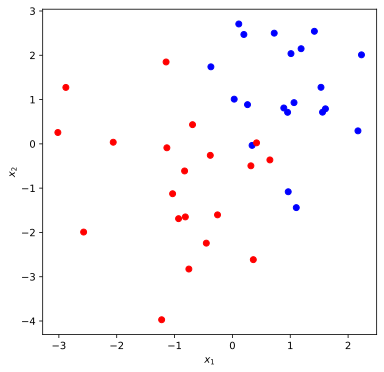

In [107]:
fig, ax = plt.subplots(figsize=(6,6))

colors = np.where(Y<0,'red','blue')
plt.scatter(X[:, 0], X[:, 1], marker='o',color=colors, label='Train')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [108]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM \n")
lin_svm.train(X,Y)
print(f'\nSupport vectors: {len(lin_svm.sv_y)}\n')
print('---------------------------------------\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=2)
print("Polynomial kernel SVM \n")
poly_svm.train(X,Y)
print(f'\nSupport vectors: {len(poly_svm.sv_y)}\n')
print('---------------------------------------\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=0.2)
print("RBF kernel SVM \n")
rbf_svm.train(X,Y)
print(f'\nSupport vectors: {len(rbf_svm.sv_y)}\n')
print('---------------------------------------\n')

Linear SVM 

     pcost       dcost       gap    pres   dres
 0: -1.2522e+01 -8.1122e+01  4e+02  2e+00  2e-15
 1: -8.0973e+00 -4.7557e+01  7e+01  3e-01  1e-15
 2: -6.6438e+00 -1.2166e+01  7e+00  2e-02  6e-15
 3: -7.7983e+00 -8.9170e+00  1e+00  3e-03  1e-15
 4: -8.0423e+00 -8.5106e+00  5e-01  8e-04  1e-15
 5: -8.1755e+00 -8.2718e+00  1e-01  7e-05  1e-15
 6: -8.2156e+00 -8.2218e+00  6e-03  3e-06  9e-16
 7: -8.2183e+00 -8.2183e+00  7e-05  3e-08  1e-15
 8: -8.2183e+00 -8.2183e+00  7e-07  3e-10  1e-15
Optimal solution found.

Support vectors: 12

---------------------------------------

Polynomial kernel SVM 

     pcost       dcost       gap    pres   dres
 0: -1.1818e+01 -8.1570e+01  4e+02  2e+00  1e-14
 1: -7.8111e+00 -4.7623e+01  7e+01  3e-01  9e-15
 2: -6.3998e+00 -1.3742e+01  1e+01  4e-02  5e-15
 3: -6.6187e+00 -8.5883e+00  3e+00  8e-03  4e-15
 4: -6.8534e+00 -7.4722e+00  8e-01  2e-03  5e-15
 5: -6.8912e+00 -7.0744e+00  2e-01  5e-04  3e-15
 6: -6.9325e+00 -6.9601e+00  3e-02  3e-05  5e

In [109]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

x1_min = X[:, 0].min() - 1
x1_max = X[:, 0].max() + 1
x2_min = X[:, 1].min() - 1
x2_max = X[:, 1].max() + 1

x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))

X_list = np.dstack([x1_list, x2_list])

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
colors = np.where(Y<0,'red','blue')

for _ax, model, title in zip(ax,[lin_svm, poly_svm, rbf_svm], 
                             ['Linear kernel', 'Polynomial kernel', 'RBF kernel']):

    h_list = model.h(X_list)
    
    _ax.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)
    _ax.scatter(X[:, 0], X[:, 1], marker='o',color=colors)


    _ax.set_xlabel('$x_1$')
    _ax.set_xlim(x1_min, x1_max)
    _ax.set_ylim(x2_min, x2_max)
    
    _ax.set_title(title)

ax[0].set_ylabel('$x_2$')

Text(0, 0.5, '$x_2$')

## Toy dataset 2

In [110]:
n = 200
d = 2

r1 = np.random.rand(n)
x1 = np.random.normal(0,1,size=(n,d))
x1 = x1/np.linalg.norm(x1,axis=-1,keepdims=True)*r1[:,np.newaxis]

r2 = 1.5 + 2*np.random.rand(n)
x2 = np.random.normal(0,1,size=(n,d))
x2 = x2/np.linalg.norm(x2,axis=-1,keepdims=True)*r2[:,np.newaxis]

X = np.vstack((x1,x2))
Y = np.array([1]*x1.shape[0] + [-1]*x2.shape[0])

Text(0, 0.5, '$x_2$')

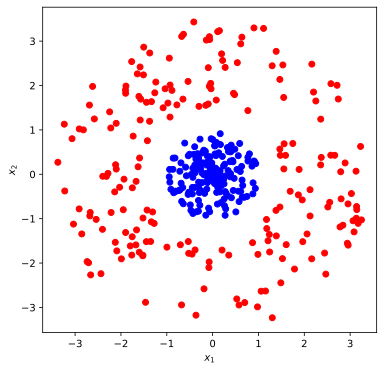

In [111]:
fig, ax = plt.subplots(figsize=(6,6))

colors = np.where(Y<0,'red','blue')
plt.scatter(X[:, 0], X[:, 1], marker='o',color=colors, label='Train')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [112]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM \n")
lin_svm.train(X,Y)
print(f'\nSupport vectors: {len(lin_svm.sv_y)}\n')
print('---------------------------------------\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=2)
print("Polynomial kernel SVM \n")
poly_svm.train(X,Y)
print(f'\nSupport vectors: {len(poly_svm.sv_y)}\n')
print('---------------------------------------\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=1.0)
print("RBF kernel SVM \n")
rbf_svm.train(X,Y)
print(f'\nSupport vectors: {len(rbf_svm.sv_y)}\n')
print('---------------------------------------\n')

Linear SVM 

     pcost       dcost       gap    pres   dres
 0: -3.9889e+02 -8.5548e+02  2e+03  2e+00  1e-14
 1: -3.2020e+02 -5.8087e+02  3e+02  4e-14  1e-14
 2: -3.7033e+02 -4.2719e+02  6e+01  2e-13  1e-14
 3: -3.7732e+02 -4.0138e+02  2e+01  2e-13  1e-14
 4: -3.8009e+02 -3.9607e+02  2e+01  6e-14  1e-14
 5: -3.8231e+02 -3.9203e+02  1e+01  2e-14  1e-14
 6: -3.8425e+02 -3.8893e+02  5e+00  1e-13  1e-14
 7: -3.8548e+02 -3.8705e+02  2e+00  1e-14  1e-14
 8: -3.8585e+02 -3.8652e+02  7e-01  1e-13  1e-14
 9: -3.8610e+02 -3.8618e+02  8e-02  2e-14  1e-14
10: -3.8614e+02 -3.8614e+02  7e-03  4e-15  1e-14
11: -3.8614e+02 -3.8614e+02  7e-04  1e-13  1e-14
12: -3.8614e+02 -3.8614e+02  8e-06  1e-13  1e-14
Optimal solution found.

Support vectors: 388

---------------------------------------

Polynomial kernel SVM 

     pcost       dcost       gap    pres   dres
 0: -1.2134e+02 -9.3235e+02  5e+03  3e+00  7e-14
 1: -7.5424e+01 -5.8019e+02  1e+03  4e-01  7e-14
 2: -4.5091e+01 -2.7518e+02  5e+02  2e-01  4

Text(0, 0.5, '$x_2$')

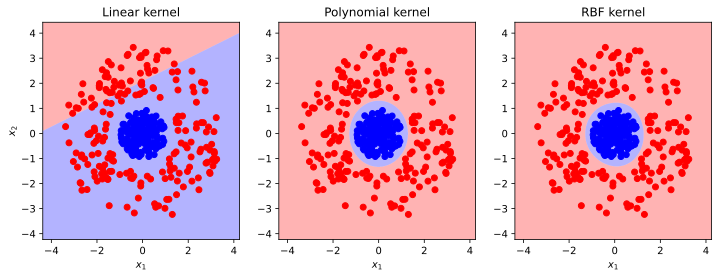

In [113]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

x1_min = X[:, 0].min() - 1
x1_max = X[:, 0].max() + 1
x2_min = X[:, 1].min() - 1
x2_max = X[:, 1].max() + 1

x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))

X_list = np.dstack([x1_list, x2_list])

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
colors = np.where(Y<0,'red','blue')

for _ax, model, title in zip(ax,[lin_svm, poly_svm, rbf_svm], 
                             ['Linear kernel', 'Polynomial kernel', 'RBF kernel']):

    h_list = model.h(X_list)
    
    _ax.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)
    _ax.scatter(X[:, 0], X[:, 1], marker='o',color=colors)


    _ax.set_xlabel('$x_1$')
    _ax.set_xlim(x1_min, x1_max)
    _ax.set_ylim(x2_min, x2_max)
    
    _ax.set_title(title)

ax[0].set_ylabel('$x_2$')

## Toy dataset 3

In [114]:
n = 500
d = 2

r = 1.5 + 0.5*np.random.rand(n)
x = np.random.normal(0,1,size=(n,d))
x = x/np.linalg.norm(x,axis=-1,keepdims=True)*r[:,np.newaxis]

x1  = x[x[:,1]>0] - 0.5
x2 = x[x[:,1]<0] + 0.5

X = np.vstack((x1,x2))
Y = np.array([1]*x1.shape[0] + [-1]*x2.shape[0])

Text(0, 0.5, '$x_2$')

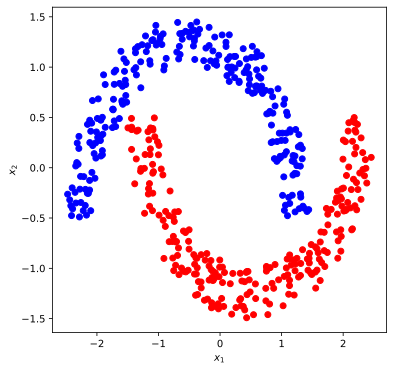

In [115]:
fig, ax = plt.subplots(figsize=(6,6))

colors = np.where(Y<0,'red','blue')
plt.scatter(X[:, 0], X[:, 1], marker='o',color=colors, label='Train')

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

In [116]:
lin_svm = BinaryKernelSVM(kernel='linear')
print("Linear SVM \n")
lin_svm.train(X,Y)
print(f'\nSupport vectors: {len(lin_svm.sv_y)}\n')
print('---------------------------------------\n')

poly_svm = BinaryKernelSVM(kernel='polynomial',degree=2)
print("Polynomial kernel SVM \n")
poly_svm.train(X,Y)
print(f'\nSupport vectors: {len(poly_svm.sv_y)}\n')
print('---------------------------------------\n')

rbf_svm = BinaryKernelSVM(kernel='rbf',sigma=1.0)
print("RBF kernel SVM \n")
rbf_svm.train(X,Y)
print(f'\nSupport vectors: {len(rbf_svm.sv_y)}\n')
print('---------------------------------------\n')

Linear SVM 

     pcost       dcost       gap    pres   dres
 0: -2.0622e+02 -1.0290e+03  4e+03  2e+00  2e-14
 1: -1.4471e+02 -6.0916e+02  7e+02  2e-01  1e-14
 2: -1.4680e+02 -2.1532e+02  8e+01  2e-02  1e-14
 3: -1.5735e+02 -1.9427e+02  4e+01  8e-03  9e-15
 4: -1.6368e+02 -1.8383e+02  2e+01  4e-03  9e-15
 5: -1.6610e+02 -1.7964e+02  1e+01  2e-03  1e-14
 6: -1.6748e+02 -1.7746e+02  1e+01  1e-03  1e-14
 7: -1.6850e+02 -1.7563e+02  7e+00  9e-04  1e-14
 8: -1.6981e+02 -1.7345e+02  4e+00  3e-04  1e-14
 9: -1.7059e+02 -1.7234e+02  2e+00  1e-04  1e-14
10: -1.7109e+02 -1.7165e+02  6e-01  8e-06  1e-14
11: -1.7123e+02 -1.7151e+02  3e-01  8e-07  1e-14
12: -1.7131e+02 -1.7141e+02  1e-01  2e-07  1e-14
13: -1.7135e+02 -1.7136e+02  6e-03  1e-08  1e-14
14: -1.7136e+02 -1.7136e+02  7e-05  1e-10  1e-14
Optimal solution found.

Support vectors: 175

---------------------------------------

Polynomial kernel SVM 

     pcost       dcost       gap    pres   dres
 0: -2.0531e+02 -1.0184e+03  4e+03  2e+00  3

Text(0, 0.5, '$x_2$')

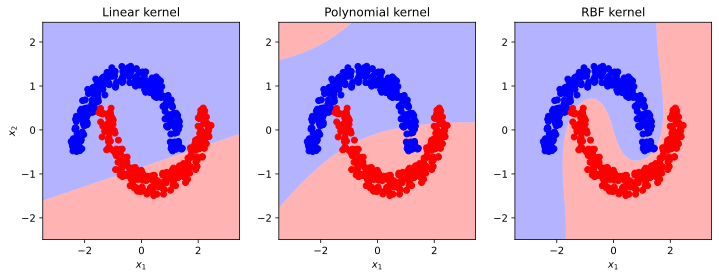

In [117]:
fig, ax = plt.subplots(1,3,figsize=(12,4))

x1_min = X[:, 0].min() - 1
x1_max = X[:, 0].max() + 1
x2_min = X[:, 1].min() - 1
x2_max = X[:, 1].max() + 1

x1_list, x2_list = np.meshgrid(np.arange(x1_min, x1_max, .01), 
                               np.arange(x2_min, x2_max, .01))

X_list = np.dstack([x1_list, x2_list])

cmap = matplotlib.colors.ListedColormap(['red', 'blue'])
colors = np.where(Y<0,'red','blue')

for _ax, model, title in zip(ax,[lin_svm, poly_svm, rbf_svm], 
                             ['Linear kernel', 'Polynomial kernel', 'RBF kernel']):

    h_list = model.h(X_list)
    
    _ax.contourf(x1_list, x2_list, h_list, cmap=cmap, alpha=.3)
    _ax.scatter(X[:, 0], X[:, 1], marker='o',color=colors)


    _ax.set_xlabel('$x_1$')
    _ax.set_xlim(x1_min, x1_max)
    _ax.set_ylim(x2_min, x2_max)
    
    _ax.set_title(title)

ax[0].set_ylabel('$x_2$')

# Exercise

Explore the effects of the hyperparameters of the RBF kernel and the polynomial kernel. Try solving the three toy classification problems with various hyperparameters, analyze the models' output and plot the results.  

- What is the effect of the $\sigma$ hyperparameter of the RBF kernel? What happens when the parameter is very small/very large?
- What degree of polynomials is sufficient to solve each of the problems? 
- Which kernel is best suited for each dataset? 